**Signal-to-Noise Ratio**


This script analyzes ECG signal denoising using the Savitzky-Golay filter by computing the Signal-to-Noise Ratio (SNR). It begins by applying the filter to a single ECG file, calculating and visualizing the SNR for each channel. Then, it performs a grid search over various filter configurations (combinations of window size and polynomial order) to evaluate their effectiveness based on mean SNR. The best configuration is identified and visualized using a heatmap. The analysis is then extended to a batch of up to 100 ECG files from the `ECGData/` directory to assess filter performance across a larger dataset and determine the most robust denoising parameters.

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import nbimporter
from code_ import savgol_filter, read_csv_multi
import seaborn as sns
from itertools import product
import os

In [9]:
filename = 'ECGData/MUSE_20180111_155115_19000.csv'
    
channels = read_csv_multi(filename)
num_channels = len(channels)
    
window_size = 3
poly_order = 1

In [10]:
def compute_snr(original, denoised):
    """
    Computes Signal-to-Noise Ratio (SNR) in decibels between original and denoised signals.
    Assumes original = signal + noise.
    """
    original = np.array(original)
    denoised = np.array(denoised)
    noise = original - denoised
    signal_power = np.mean(denoised ** 2)
    noise_power = np.mean(noise ** 2)
    if noise_power == 0:
        return np.inf
    return 10 * np.log10(signal_power / noise_power)

Channel 1: SNR after filtering = 30.57 dB
Channel 2: SNR after filtering = 29.35 dB
Channel 3: SNR after filtering = 29.44 dB
Channel 4: SNR after filtering = 29.52 dB
Channel 5: SNR after filtering = 29.71 dB
Channel 6: SNR after filtering = 29.02 dB
Channel 7: SNR after filtering = 43.43 dB
Channel 8: SNR after filtering = 45.37 dB
Channel 9: SNR after filtering = 45.21 dB
Channel 10: SNR after filtering = 36.93 dB
Channel 11: SNR after filtering = 32.43 dB
Channel 12: SNR after filtering = 33.47 dB


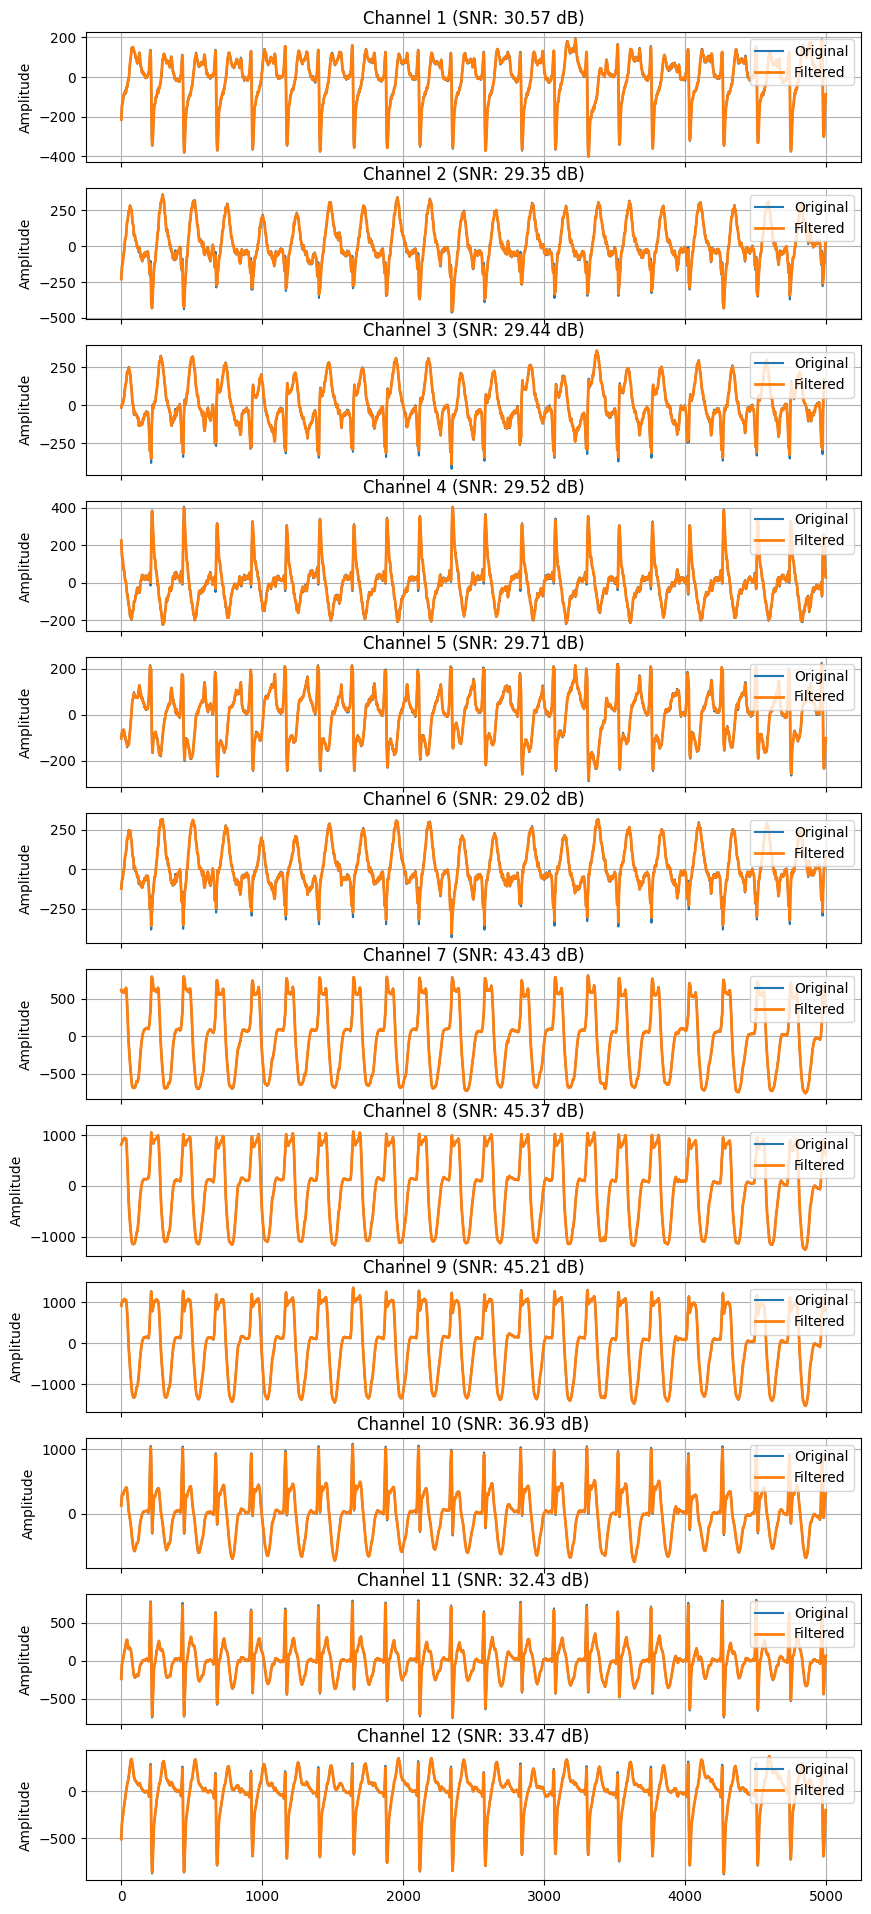

In [11]:
fig, axs = plt.subplots(num_channels, 1, figsize=(10, 2*num_channels), sharex=True)
for i, channel in enumerate(channels):
        filtered_channel = savgol_filter(channel, window_size, poly_order)
        x_values = list(range(len(channel)))
        
        # Compute SNR
        snr_value = compute_snr(channel, filtered_channel)
        print(f"Channel {i+1}: SNR after filtering = {snr_value:.2f} dB")

        axs[i].plot(x_values, channel, label='Original')
        axs[i].plot(x_values, filtered_channel, label='Filtered', linewidth=2)
        axs[i].set_ylabel('Amplitude')
        axs[i].legend(loc='upper right')
        axs[i].grid(True)
        axs[i].set_title(f'Channel {i+1} (SNR: {snr_value:.2f} dB)')

Window=3, PolyOrder=1 -> Mean SNR = 28.24 dB
Window=3, PolyOrder=2 -> Mean SNR = 313.22 dB
Window=5, PolyOrder=1 -> Mean SNR = 21.14 dB
Window=5, PolyOrder=2 -> Mean SNR = 34.90 dB
Window=5, PolyOrder=3 -> Mean SNR = 34.90 dB
Window=5, PolyOrder=4 -> Mean SNR = 294.73 dB
Window=7, PolyOrder=1 -> Mean SNR = 16.96 dB
Window=7, PolyOrder=2 -> Mean SNR = 28.80 dB
Window=7, PolyOrder=3 -> Mean SNR = 28.80 dB
Window=7, PolyOrder=4 -> Mean SNR = 37.13 dB
Window=7, PolyOrder=5 -> Mean SNR = 37.13 dB
Window=7, PolyOrder=6 -> Mean SNR = 284.32 dB
Window=9, PolyOrder=1 -> Mean SNR = 14.01 dB
Window=9, PolyOrder=2 -> Mean SNR = 24.90 dB
Window=9, PolyOrder=3 -> Mean SNR = 24.90 dB
Window=9, PolyOrder=4 -> Mean SNR = 31.92 dB
Window=9, PolyOrder=5 -> Mean SNR = 31.92 dB
Window=9, PolyOrder=6 -> Mean SNR = 38.35 dB
Window=9, PolyOrder=7 -> Mean SNR = 38.35 dB
Window=9, PolyOrder=8 -> Mean SNR = 250.40 dB
Window=11, PolyOrder=1 -> Mean SNR = 11.74 dB
Window=11, PolyOrder=2 -> Mean SNR = 22.01 dB
Wind

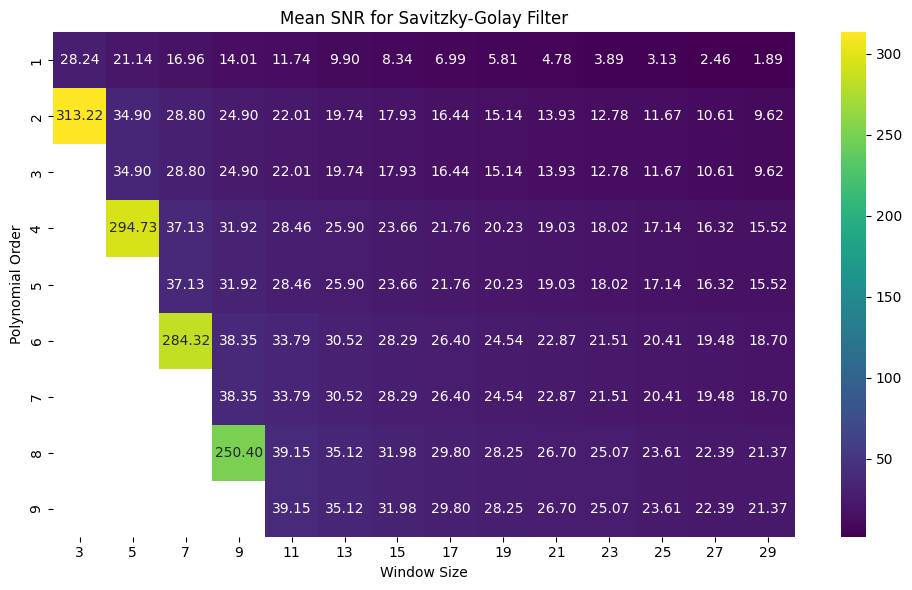

Best filter: window=3, poly_order=2, mean SNR=313.22 dB


In [23]:

window_sizes = list(range(3, 31, 2)) 
poly_orders = list(range(1, 10)) 

results = {}

for w, p in product(window_sizes, poly_orders):
    if p >= w:
        continue  
    snrs = []
    for channel in channels:
        filtered = savgol_filter(channel, w, p)
        snr = compute_snr(channel, filtered)
        snrs.append(snr)
    mean_snr = np.mean(snrs)
    results[(w, p)] = mean_snr
    print(f"Window={w}, PolyOrder={p} -> Mean SNR = {mean_snr:.2f} dB")


heatmap_matrix = np.full((len(poly_orders), len(window_sizes)), np.nan)
for i, p in enumerate(poly_orders):
    for j, w in enumerate(window_sizes):
        if (w, p) in results:
            heatmap_matrix[i, j] = results[(w, p)]

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_matrix, annot=True, fmt=".2f", cmap='viridis',
            xticklabels=window_sizes, yticklabels=poly_orders)
plt.title("Mean SNR for Savitzky-Golay Filter")
plt.xlabel("Window Size")
plt.ylabel("Polynomial Order")
plt.tight_layout()
plt.show()

best_combo = max(results.items(), key=lambda x: x[1])
print(f"Best filter: window={best_combo[0][0]}, poly_order={best_combo[0][1]}, mean SNR={best_combo[1]:.2f} dB")


🔍 Running SNR grid search over multiple ECG files...

Window=3, PolyOrder=1 → Mean SNR = 23.94 dB
Window=3, PolyOrder=2 → Mean SNR = 313.24 dB
Window=5, PolyOrder=1 → Mean SNR = 18.78 dB
Window=5, PolyOrder=2 → Mean SNR = 27.81 dB
Window=5, PolyOrder=3 → Mean SNR = 27.81 dB
Window=5, PolyOrder=4 → Mean SNR = 294.73 dB
Window=7, PolyOrder=1 → Mean SNR = 15.77 dB
Window=7, PolyOrder=2 → Mean SNR = 23.20 dB
Window=7, PolyOrder=3 → Mean SNR = 23.20 dB
Window=7, PolyOrder=4 → Mean SNR = 29.57 dB
Window=7, PolyOrder=5 → Mean SNR = 29.57 dB
Window=7, PolyOrder=6 → Mean SNR = 284.11 dB
Window=9, PolyOrder=1 → Mean SNR = 13.42 dB
Window=9, PolyOrder=2 → Mean SNR = 20.94 dB
Window=9, PolyOrder=3 → Mean SNR = 20.94 dB
Window=9, PolyOrder=4 → Mean SNR = 25.10 dB
Window=9, PolyOrder=5 → Mean SNR = 25.10 dB
Window=9, PolyOrder=6 → Mean SNR = 30.71 dB
Window=9, PolyOrder=7 → Mean SNR = 30.71 dB
Window=9, PolyOrder=8 → Mean SNR = 244.46 dB
Window=11, PolyOrder=1 → Mean SNR = 11.47 dB
Window=11, PolyOr

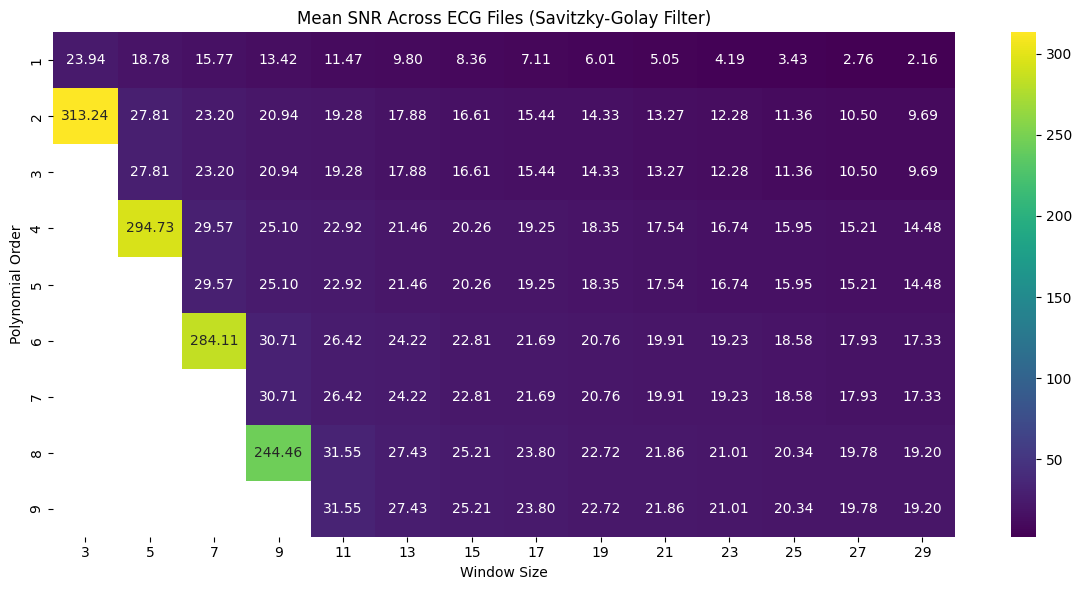

In [24]:
ecg_dir = "ECGData"
window_sizes = list(range(3, 31, 2))   
poly_orders = list(range(1, 10)) 
use_subset = True
max_files = 100 


all_files = [os.path.join(ecg_dir, f) for f in os.listdir(ecg_dir) if f.endswith('.csv')]
if use_subset:
    all_files = all_files[:max_files]

results = {}

print("Running SNR grid search over multiple ECG files...\n")

for w, p in product(window_sizes, poly_orders):
    if p >= w:
        continue
    file_snrs = []
    for filepath in all_files:
        try:
            channels = read_csv_multi(filepath)
            test_channels = [ch[:2000] for ch in channels[:3]] if use_subset else channels
            snrs = []
            for channel in test_channels:
                filtered = savgol_filter(channel, w, p)
                snr = compute_snr(channel, filtered)
                snrs.append(snr)
            file_snrs.append(np.mean(snrs))
        except Exception as e:
            print(f"Failed on {filepath}: {e}")
            continue
    if file_snrs:
        overall_mean_snr = np.mean(file_snrs)
        results[(w, p)] = overall_mean_snr
        print(f"Window={w}, PolyOrder={p} → Mean SNR = {overall_mean_snr:.2f} dB")


best_combo = max(results.items(), key=lambda x: x[1])
best_window, best_poly = best_combo[0]
best_snr = best_combo[1]
print(f"\nBest overall filter: window={best_window}, poly_order={best_poly}, mean SNR={best_snr:.2f} dB")


heatmap_matrix = np.full((len(poly_orders), len(window_sizes)), np.nan)
for i, p in enumerate(poly_orders):
    for j, w in enumerate(window_sizes):
        if (w, p) in results:
            heatmap_matrix[i, j] = results[(w, p)]

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_matrix, annot=True, fmt=".2f", cmap='viridis',
            xticklabels=window_sizes, yticklabels=poly_orders)
plt.title("Mean SNR Across ECG Files (Savitzky-Golay Filter)")
plt.xlabel("Window Size")
plt.ylabel("Polynomial Order")
plt.tight_layout()
plt.show()